Emma Klemets, 260775167

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

### 1

err bounds from derivatives  
or easier to interpolate every other point and check with other half for errors

#### a)   
We have i) $f'(x) = \frac{f(x+\delta) - f(x-\delta)}{2\delta}$ and ii) $f'(x) = \frac{f(x+2\delta) - f(x-2\delta)}{4\delta}$ we our four points.  

Taylor expand them both:  
i) $f'(x) = \frac{1}{2\delta}[f + \delta f'+\frac{1}{2}\delta^2 f''+\frac{1}{6}\delta^3 f'''+\frac{1}{24}\delta^4 f^{IV}+\frac{1}{120}\delta^5 f^{V} ... - (f - \delta f'+\frac{1}{2}\delta^2 f''-\frac{1}{6}\delta^3 f'''+\frac{1}{24}\delta^4 f^{IV}-\frac{1}{120}\delta^5 f^{V}...)] \\
f'(x) = \frac{1}{2\delta}[2\delta f'+\frac{2}{6}\delta^3 f'''+\frac{2}{120}\delta^5 f^{V}...] = f'+\frac{1}{6}\delta^2 f'''+\frac{1}{120}\delta^4 f^{V} ...$

ii) $f'(x) = \frac{1}{4\delta}[f + 2\delta f'+\frac{4}{2}\delta^2 f''+\frac{8}{6}\delta^3 f'''+\frac{16}{24}\delta^4 f^{IV}+\frac{1024}{120}\delta^5 f^{V} ... - (f + 2\delta f'+\frac{4}{2}\delta^2 f''+\frac{8}{6}\delta^3 f'''+\frac{16}{24}\delta^4 f^{IV}+\frac{1024}{120}\delta^5 f^{V}...)] \\
f'(x) = \frac{1}{4\delta}[4\delta f'+\frac{16}{6}\delta^3 f'''+\frac{2048}{120}\delta^5 f^{V}...]= f'+\frac{2}{6}\delta^2 f'''+\frac{512}{120}\delta^4 f^{V} ... $

And use these two to cancel the $f'''$ term.

$2*i) - ii) = f' - \frac{511}{120}\delta^4 f^{V} ... $ 

So our estimate of the first derivative at x is 

$f'(x) = \frac{f(x+\delta) - f(x-\delta)}{\delta} - \frac{f(x+2\delta) - f(x-2\delta)}{4\delta} \\
= \frac{f(x-2\delta) + 4f(x+\delta) - 4f(x-\delta) - f(x+2\delta)}{4\delta}$  

with truncation error $\mathcal{O}(|\delta^4 f^{V}|) $

#### b) What should delta be?
$d/d\delta (f' - \frac{511}{120}\delta^4 f^{V})$

In [2]:
# need to actually pick a good lamdba -> do the math

exp_1 = lambda x: np.exp(x)
exp_2 = lambda x: np.exp(0.01*x)

exp_1_deriv = exp_1
exp_2_deriv = lambda x: 0.01*np.exp(0.01*x)


def deriv_app(func, x, delta):
    return (func(x+delta) - func(x-delta))/delta - (func(x+2*delta) - func(x-2*delta))/(4*delta)

In [3]:
approx_1 = deriv_app(exp_1, 0, 0.1)

approx_2 = deriv_app(exp_2, 0, 0.1)

print(approx_1, exp_1_deriv(0))
print(approx_2, exp_2_deriv(0))

0.9966549876914119 1.0
0.009999996666665567 0.01


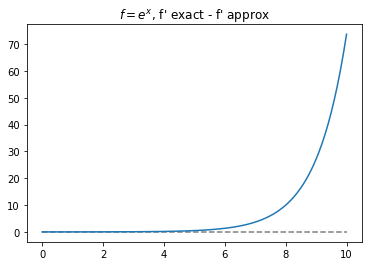

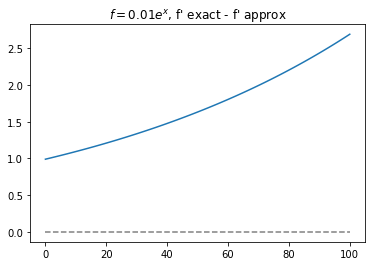

In [4]:
x = np.linspace(0, 10, 100)

plt.plot(x, exp_1(x) - deriv_app(exp_1, x, 0.1))
plt.title("$f = e^x$, f' exact - f' approx")
plt.hlines(0, x[0], x[-1], color="black", ls="--", alpha=0.5)
plt.show()

x = np.linspace(0, 100, 100)

plt.plot(x, exp_2(x) - deriv_app(exp_2, x, 0.1))
plt.title("$f = 0.01e^x$, f' exact - f' approx")
plt.hlines(0, x[0], x[-1], color="black", ls="--", alpha=0.5)
plt.show()

### 2
They are fed with a constant 10 µA current, and the voltage is read out.  
Lakeshore provides a chart that converts voltage to temperature  

take an arbitrary voltage and interpolate to return a temperature.   
You should also make some sort of quantitative (but possibly rough) estimate of the error in your interpolation as well

In [5]:
#[Temp [k], Voltage (V), dV/dT [mV/K]]
data = np.transpose(np.loadtxt('lakeshore.txt'))

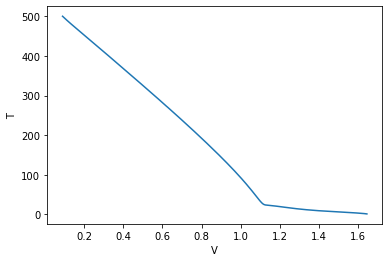

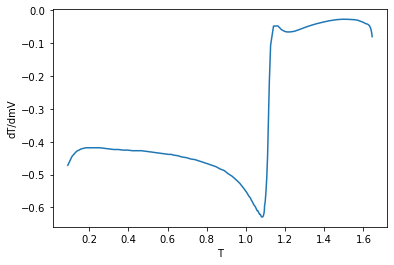

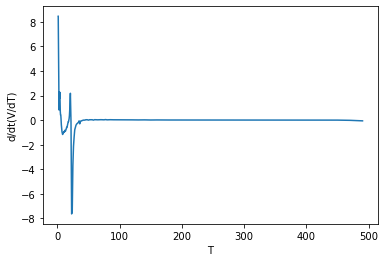

In [82]:
# print(data)
plt.plot(data[1], data[0])
plt.ylabel('T')
plt.xlabel('V')
plt.show()

plt.plot(data[1], 1/data[2])
plt.xlabel('T')
plt.ylabel('dT/dmV')
plt.show()

plt.plot(data[0][:-1], second_deriv)
plt.xlabel('T')
plt.ylabel('d/dt(V/dT)')
plt.show()


Linear error bound:   
$|err| \leq \frac{(x_0 - x_1)^2}{8} \max_{x_0 \leq x \leq x_1} (|f''(x)|)$  

So for each interval of ($x_0, x_1$), I will find the second derivative numerically.

In [116]:
#gotta fit the data and get error -> need to invert
# can use dervi for error bounds

#linear equation from two points
def lin_equ(l1, l2):

    m = (l2[1] - l1[1]) / (l2[0] - l1[0])
    c = (l2[1] - (m * l2[0]))
#     print(m, c)
    return lambda x: m*x+c

#linear interpolation
def linearInterp(data, x):
    y_interp = []
    errors = []
    
    if isinstance(x, int) or isinstance(x, float):
        x = [x]
    
    for i in range(len(x)):
        
        #finds right neighbour of x[i] in the data
        myind=np.argmax(np.where(x[i]<data[1]))
#         print(x[i], myind)
        
        #get linear function from two closest points
        f = lin_equ((data[1][myind], data[0][myind]), (data[1][myind-1], data[0][myind-1]))
        
        #evaluate at x
        y_interp.append(f(x[i]))
        
        #get second derivative (this is pretty rough)
        second_deriv = (1/data[2][myind-1] - 1/data[2][myind])/(data[1][myind-1] - data[1][myind])
        
        errors.append((data[1][myind] - data[1][myind-1])**2/8 * np.abs(second_deriv))
    
    return y_interp, errors

def linearErr(data, x):
    errors = []
    
    if isinstance(x, int) or isinstance(x, float):
        x = [x]
    
    for i in range(len(x)):
        
        #finds right neighbour of x[i] in the data
        myind=np.argmax(np.where(x[i]<data[1]))
#         print(x[i], myind)
        
     
        #get second derivative (this is pretty rough)
        second_deriv = (1/data[2][myind-1] - 1/data[2][myind])/(data[1][myind-1] - data[1][myind])
#         print((data[2][myind-1] - data[2][myind]), (data[1][myind-1] - data[1][myind]))
        
        errors.append((data[1][myind] - data[1][myind-1])**2/8 * np.abs(second_deriv))
#         print(data[1][myind] - data[1][myind-1], second_deriv)
    
    return errors

In [117]:
y_interp_err = linearErr(data, x)

print(y_interp_err)

[2.130530051973e-05, 1.0514097064067844e-05, 0.0, 0.0, 5.235399599170288e-06, 5.262073183703711e-06, 5.291693484946246e-06, 5.307654165163982e-06, 0.0, 5.3321058374250835e-06, 0.0, 5.352426543413594e-06, 5.377525159094314e-06, 5.43407679277259e-06, 5.458040630339772e-06, 5.480301463265183e-06, 1.7295096220727526e-06, 1.1117750474083292e-05, 1.1271635249477474e-05, 5.671791443850219e-06, 1.1411592994161773e-05, 1.1640057113188111e-05, 1.1747266795979394e-05, 1.799430641821959e-05, 1.2133851773300332e-05, 1.882066938037083e-05, 2.5525877330000973e-05, 3.336593172119481e-05, 1.0519067796610122e-05, 3.8067712634187085e-06, 0.0, 0.0, 2.6385750042525927e-05, 2.6790876777251136e-05, 1.069004524886879e-05, 0.0, 1.1928519593613944e-06, 2.133722995446757e-06, 2.8309252958203974e-06, 3.0384517865501746e-06, 3.110184372256365e-06, 3.441388846212919e-06, 3.2654328566841056e-06, 2.109707971586419e-06, 3.402302415394594e-07, 2.063308862483952e-07, 3.581837830757085e-07, 2.508613746196539e-07, 1.52444

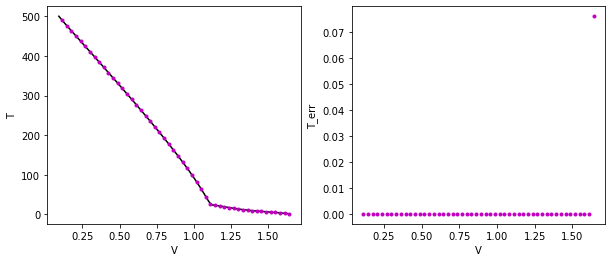

In [103]:
# x = np.linspace(2, 400, 50)
x = np.linspace(data[1][-2], data[1][1], 50)
# print(x)

y_interp, y_interp_err = linearInterp(data, x)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(data[1], data[0], color="black")
ax[0].plot(x, y_interp, ls = '', marker=".", color="m")

ax[0].set_xlabel('V')
ax[0].set_ylabel('T')

ax[1].plot(x, y_interp_err, ls = '', marker=".", color="m")
ax[1].set_xlabel('V')
ax[1].set_ylabel('T_err')
plt.show()

In [98]:
#enter your own number:

x = 0.4 #K
y_interp, y_interp_err = linearInterp(data, x)

# arbitrary voltage and interpolate to return a temperature.
print("The input voltage was: {0} V, the temperature is: {1} {2} K".format(x, y_interp[0], y_interp_err[0]))

The input voltage was: 0.4 V, the temperature is: 368.5259066250908 0.0 K


### 3 
Take cos(x) between −π/2 and π/2.   
Compare the accuracy of polynomial, cubic spline, and rational function interpolation given some modest number of points, but for fairness each method should use the same points.  

Now try using a Lorentzian 1/(1 + x2) between -1 and 1. What should the error be for the Lorentzian from the rational function fit?  
Does what you got agree with your expectations when the order is higher (say n=4, m=5)? What happens if you switch from np.linalg.inv to np.linalg.pinv (which tries to deal with singular matrices)? Can you understand what has happened by looking at p and q?¡  

In [37]:
#from class example 
def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_fit(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y) #change this
#     pars=np.dot(np.linalg.pinv(mat),y)    #np.linalg.pinv
    p=pars[:n]
    q=pars[n:]
    return p,q

In [73]:
def fit_3(func, x_min, x_max, n=4, m=7):
    
    x = np.linspace(x_min, x_max, 10)
    y = func(x)

    xFit = np.linspace(x[0],x[-1],2000)
    y_true = func(xFit)

    #polynominal
    resl = np.polyfit(x,y, 2)
    p = np.poly1d(resl)
    yFit_poly = p(xFit)
    rms_poly = np.std(yFit_poly-y_true)

    #cubic spline
    spln = interpolate.splrep(x,y)
    yFit_spln = interpolate.splev(xFit,spln)
    rms_spln = np.std(yFit_spln-y_true)

    #rational
    p,q=rat_fit(x,y,n,m)
    yFit_rat=rat_eval(p,q,xFit)
    rms_rat = np.std(yFit_rat-y_true)
    
    return [x, y, xFit, y_true], [yFit_poly, rms_poly, yFit_spln, rms_spln, yFit_rat, rms_rat]

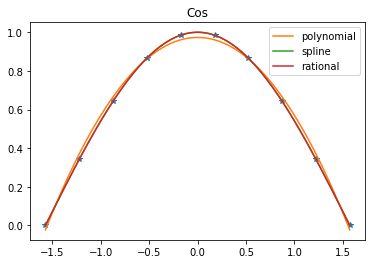

0.020035511758941697 5.477762871543277e-05 1.5669894908708902e-06


In [75]:
results = fit_3(np.cos, -np.pi/2, np.pi/2)
yFit_poly, rms_poly, yFit_spln, rms_spln, yFit_rat, rms_rat = results[1]
x, y, xFit, y_true = results[0]

plt.clf();
plt.plot(x,y,'*')

plt.plot(xFit, yFit_poly, label="polynomial")
plt.plot(xFit, yFit_spln, label="spline")
plt.plot(xFit, yFit_rat, label="rational")
plt.title("Cos(x)")
plt.legend()
plt.show()

print(rms_poly, rms_spln, rms_rat)

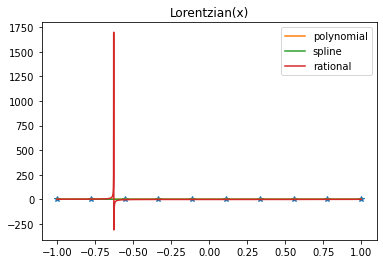

0.031092877852850306 0.00018166333660772304 39.530038348775406


In [79]:
def Lor(x):
    return 1/(1+x**2)

results = fit_3(Lor, -1, 1)

yFit_poly, rms_poly, yFit_spln, rms_spln, yFit_rat, rms_rat = results[1]
x, y, xFit, y_true = results[0]

plt.clf();
plt.plot(x,y,'*')

plt.plot(xFit, yFit_poly, label="polynomial")
plt.plot(xFit, yFit_spln, label="spline")
# plt.plot(xFit, yFit_rat, label="rational")
plt.title("Lorentzian(x)")
plt.legend()
plt.show()

print(rms_poly, rms_spln, rms_rat)

#4 One can work out the electric field from an infinitessimally thin spherical shell of charge with radius R by working out the field from a ring along its central axis, and integrating those rings to form a spherical shell. 

Use both your integrator and scipy.integrate.quad to plot the electric field from the shell as a function of distance from the center of the sphere. 

Make sure the range of your plot covers regions with z < R and z > R. Make sure one of your z values is R. Is there a singularity in the integral? Does quad care? Does your integrator? 

Griffiths problem 2.7, which sets up the integral.